In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
file_name = 'realistic_housing_data.xlsx'
df = pd.read_excel(file_name)


In [20]:
print(f"\n Dataset Shape: {df.shape}")
print(f"Features: {df.columns.tolist()}")


 Dataset Shape: (5000, 15)
Features: ['bedrooms', 'bathrooms', 'sqft', 'lot_size', 'age', 'year_built', 'garage', 'location', 'house_type', 'condition', 'has_pool', 'has_fireplace', 'has_basement', 'school_rating', 'price']


In [21]:
print(df.info)

<bound method DataFrame.info of       bedrooms  bathrooms  sqft  lot_size  age  year_built  garage  \
0            3          5  2229     12569   38        1986       1   
1            3          2  1897      8942   27        1997       3   
2            4          2  2397      4826   46        1978       0   
3            5          3  2849      2490   39        1985       2   
4            2          3  1895     11910   41        1983       1   
...        ...        ...   ...       ...  ...         ...     ...   
4995         2          3  2038      7397    5        2019       2   
4996         3          3  2171      4519   30        1994       3   
4997         1          2  1314      6982   19        2005       0   
4998         3          2  2022      3104   38        1986       1   
4999         2          4  2116      1000    3        2021       2   

        location house_type  condition  has_pool  has_fireplace  has_basement  \
0          Rural      Condo          4        

In [22]:
df.head()

,bedrooms,bathrooms,sqft,lot_size,age,year_built,garage,location,house_type,condition,has_pool,has_fireplace,has_basement,school_rating,price
0,3,5,2229,12569,38,1986,1,Rural,Condo,4,0,1,0,10,199148
1,3,2,1897,8942,27,1997,3,Rural,Townhouse,3,0,0,1,3,152932
2,4,2,2397,4826,46,1978,0,Downtown,Townhouse,2,0,0,0,6,230854
3,5,3,2849,2490,39,1985,2,Hills,House,3,0,1,1,4,263271
4,2,3,1895,11910,41,1983,1,Downtown,Townhouse,4,0,0,0,5,274804


In [23]:
df.tail()

,bedrooms,bathrooms,sqft,lot_size,age,year_built,garage,location,house_type,condition,has_pool,has_fireplace,has_basement,school_rating,price
4995,2,3,2038,7397,5,2019,2,Rural,Condo,1,0,1,0,3,152185
4996,3,3,2171,4519,30,1994,3,Suburb,Townhouse,2,1,1,0,5,281072
4997,1,2,1314,6982,19,2005,0,Hills,Townhouse,3,1,1,1,5,284277
4998,3,2,2022,3104,38,1986,1,Waterfront,Villa,2,1,1,0,4,409124
4999,2,4,2116,1000,3,2021,2,Hills,Townhouse,3,0,1,1,10,540074


In [24]:
print(df.describe())

         bedrooms    bathrooms         sqft      lot_size          age  \
count  5000.00000  5000.000000  5000.000000   5000.000000  5000.000000   
mean      3.20160     2.410600  2160.496600   8090.264200    24.581000   
std       1.28019     1.066881   436.624535   3021.882128    14.316132   
min       1.00000     1.000000   858.000000   1000.000000     0.000000   
25%       2.00000     2.000000  1851.000000   5918.250000    12.000000   
50%       3.00000     2.000000  2153.000000   8124.000000    25.000000   
75%       4.00000     3.000000  2455.250000  10211.000000    37.000000   
max       6.00000     5.000000  3620.000000  19332.000000    49.000000   

        year_built       garage    condition     has_pool  has_fireplace  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean   1999.419000     1.384600     3.259600     0.197000       0.404400   
std      14.316132     0.904238     0.975089     0.397772       0.490825   
min    1975.000000     0.0000

In [25]:
df.isnull().sum()

bedrooms         0
bathrooms        0
sqft             0
lot_size         0
age              0
year_built       0
garage           0
location         0
house_type       0
condition        0
has_pool         0
has_fireplace    0
has_basement     0
school_rating    0
price            0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

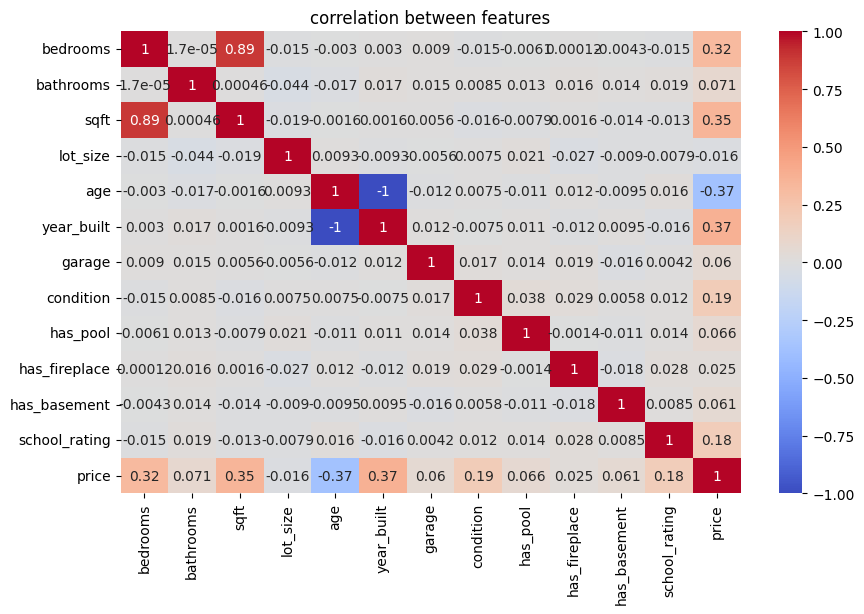

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("correlation between features")
plt.show

In [27]:
X = df.drop('price', axis=1)
y = df['price']

In [28]:
categories_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

In [29]:
print(categories_features)
print(numerical_features)

Index(['location', 'house_type'], dtype='object')
Index(['bedrooms', 'bathrooms', 'sqft', 'lot_size', 'age', 'year_built',
       'garage', 'condition', 'has_pool', 'has_fireplace', 'has_basement',
       'school_rating'],
      dtype='object')


In [32]:
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown='ignore'), categories_features),
    ("scale", StandardScaler(), numerical_features)
])

In [41]:
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
    
])


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [45]:
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('onehot', ...), ('scale', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers

In [46]:
y_pred = pipeline.predict(X_test)

In [47]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)